# Apresentação do Dataset e Objetivos da Análise

Grupo: Gustavo Folena, Mária Júlia, Hugo Jorge

Turma: TDAS022
## Dataset: Pessoas Vacinadas em 2022

Olá a todos,

Nesta análise, estaremos explorando um dataset que contém informações sobre pessoas vacinadas em 2023 da cidade do Recife. Diante do contexto global da pandemia de COVID-19, a vacinação desempenha um papel fundamental na proteção da saúde pública e no combate à propagação do vírus. Portanto, é crucial entender os padrões de vacinação, eficácia das vacinas e o impacto das campanhas de imunização.

### Objetivos da Análise:

1. Compreensão dos Padrões de Vacinação: Realizar uma análise descritiva básica para entender as características básicas dos vacinados, como faixa etária, sexo, raça/cor e grupo prioritário. Isso pode ser feito usando estatísticas simples, como média, mediana e contagens.

2. Análise de Distribuição Geográfica: Visualizar a distribuição geográfica da vacinação por município. Você pode criar um mapa mostrando a quantidade de vacinados em cada município ou região.

3. Identificação de Correlações: Investigar possíveis correlações entre variáveis como idade, sexo, raça/cor e categoria de vacinação. Isso pode ser feito usando técnicas básicas de análise estatística, como calcular coeficientes de correlação.

Ao finalizar esta análise exploratória inicial, esperamos extrair insights valiosos que possam contribuir para o aprimoramento das estratégias de vacinação e para o controle da disseminação da COVID-19 e outras doenças infecciosas.

Vamos começar!



In [3]:
# Instalar bibliotecas usando pip
%pip install pandas matplotlib folium tabulate seaborn scikit-learn plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from tabulate import tabulate
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
# Link do arquivo csv
link = "https://drive.google.com/file/d/1dmb6ozHifVKAq61dgCjqICOb2kKd-ov8/view?usp=sharing"

# Extrair o ID do arquivo
file_id = link.split("/")[-2]

# Formar o link de download direto
download_link = f"https://drive.google.com/uc?id={file_id}"

In [3]:
# Carregar o arquivo CSV usando pandas
df = pd.read_csv(download_link)

In [4]:
# Retorna as primeiras 5 linhas do DataFrame
df.head()


,_id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,1,40 a 44 anos,40.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,222VCD045W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),3,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-09-14T00:00:00
1,2,70 a 74 anos,73.0,FEMININO,BRANCA,RECIFE,IDOSOS,NaN,FN9607,3 - COMIRNATY (PFIZER),4,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-06-12T00:00:00
2,3,30 a 34 anos,33.0,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FM2948,3 - COMIRNATY (PFIZER),3,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2022-03-30T00:00:00
3,4,60 a 64 anos,60.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,21PVCD362W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2022-07-19T00:00:00
4,5,35 a 39 anos,38.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,221VCDO32Z,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),4,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,ESUS,2022-08-18T00:00:00


In [5]:
# Retorna as últimas 5 linhas do DataFrame.
df.tail()

,_id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
379745,379746,15 a 19 anos,17.0,FEMININO,BRANCA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,NaN,FM2951,3 - COMIRNATY (PFIZER),2,DS 8: CNES: 0001198 - UBT ARISTARCHO DE AZEVEDO,Conecta Recife,2022-01-18T00:00:00
379746,379747,5 a 9 anos,6.0,MASCULINO,PARDA,RECIFE,CRIANÇAS DE 05 A 11 ANOS,NaN,FR8392,5 - COMIRNATY (PFIZER) - PEDIÁTRICA,1,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-02-26T00:00:00
379747,379748,10 a 14 anos,10.0,FEMININO,PARDA,RECIFE,CRIANÇAS DE 05 A 11 ANOS,NaN,FR8392,5 - COMIRNATY (PFIZER) - PEDIÁTRICA,1,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2022-02-26T00:00:00
379748,379749,50 a 54 anos,51.0,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FJ8766,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2022-01-14T00:00:00
379749,379750,50 a 54 anos,51.0,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FJ8766,3 - COMIRNATY (PFIZER),3,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2022-01-15T00:00:00


In [6]:
#Gera estatísticas descritivas para todas as colunas numéricas do DataFrame
df.describe()

,_id,idade,descricao_dose
count,379750.0000,379749.000000,379750.000000
mean,189875.5000,35.430700,2.581161
std,109624.5267,21.057192,0.995615
min,1.0000,-952.000000,1.000000
25%,94938.2500,16.000000,2.000000
50%,189875.5000,37.000000,3.000000
75%,284812.7500,53.000000,3.000000
max,379750.0000,118.000000,5.000000


In [7]:
# Retorna uma tupla representando o número de linhas e o número de colunas
df.shape

(379750, 14)

In [8]:
#Fornece informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379750 entries, 0 to 379749
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                379750 non-null  int64  
 1   faixa_etaria       379748 non-null  object 
 2   idade              379749 non-null  float64
 3   sexo               379743 non-null  object 
 4   raca_cor           379679 non-null  object 
 5   municipio          379748 non-null  object 
 6   grupo              379750 non-null  object 
 7   categoria          42939 non-null   object 
 8   lote               379663 non-null  object 
 9   vacina_fabricante  379750 non-null  object 
 10  descricao_dose     379750 non-null  int64  
 11  cnes               379750 non-null  object 
 12  sistema_origem     379750 non-null  object 
 13  data_vacinacao     379750 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 40.6+ MB


**Podemos fazer alguns questionamentos após termos essas informações.**



1.   Valores ausentes:
 Alguns das colunas têm contagens de valores não nulos menores do que o número total de entradas (379750), o que indica a presença de valores ausentes.


2.   Tipos de dados:
  Os tipos de dados parecem apropriados para a maioria das colunas. No entanto, a coluna idade está representada como float64, que pode ser convertida para um tipo de dados inteiro se todas as idades forem números inteiros.

3. Data:
  A coluna data_vacinacao está representada como objeto (provavelmente string). Se você pretende realizar operações de data e hora, convém converter essa coluna para o tipo de dados datetime.




In [9]:
# Vamos começar lidando com os valores NaN, pois dependendo do contexto deles, podemos optar por remover os valores NaN se a perda de dados não for significativa ou se os valores NaN estiverem distribuídos uniformemente no conjunto de dados. Se os valores NaN representarem uma proporção significativa dos nossos dados ou se acreditarmos que eles contêm informações úteis, pode ser mais apropriado substituí-los por outro valor.

# Contar valores NaN em cada coluna
total_nan_por_coluna = df.isna().sum()

# Mostrar o total de valores NaN em cada coluna
print("Total de valores NaN por coluna:")
print(total_nan_por_coluna)

# Mostrar o total de valores NaN em todo o DataFrame
total_nan_total = total_nan_por_coluna.sum()
print("\nTotal de valores NaN em todo o DataFrame:", total_nan_total)

Total de valores NaN por coluna:
_id                       0
faixa_etaria              2
idade                     1
sexo                      7
raca_cor                 71
municipio                 2
grupo                     0
categoria            336811
lote                     87
vacina_fabricante         0
descricao_dose            0
cnes                      0
sistema_origem            0
data_vacinacao            0
dtype: int64

Total de valores NaN em todo o DataFrame: 336981


**Pensamentos**


*   Temos 379750 linhas e 336811 linhas da coluna categoria são NaN. Por que??
*   O que são esses 42.939 dados da coluna categoria ?
*   Olhar os outros NaN nas demais colunas para tentar entender se eles irão influenciar em algo
 - faixa_etaria: Como são apenas 2 valores ausentes, podemos simplesmente remover as linhas correspondentes, já que a perda de dados será mínima.
 - sexo: Com apenas 7 valores ausentes, podemos preencher os valores ausentes com uma categoria como "Não informado".
 - raca_cor: Com 71 valores ausentes, podemos preencher os valores ausentes com uma categoria como "Não informado".
 - municipio: Semelhante à 'faixa_etaria', como são apenas 2 valores ausentes, podemos remover as linhas correspondentes.
 - lote: Com 87 valores ausentes, podemos preencher os valores ausentes com uma categoria como "Não informado".
 - categoria: Com 336811 valores ausentes, podemos preencher eles com o "Não informado"








In [10]:
# Olhar a coluna categoria

# Selecionar as linhas onde os valores da coluna 'categoria' não são NaN
dados_validos_categoria = df[df['categoria'].notna()]

# Exibir os dados não NaN da coluna 'categoria'
print(dados_validos_categoria['categoria'])

23                        OUTRA DEFICIÊNCIA INTELECTUAL
31                        PESSOAS COM OBESIDADE MÓRBIDA
43                                            PUÉRPERAS
59                        OUTRA DEFICIÊNCIA INTELECTUAL
63        PESSOAS COM OBESIDADE MÓRBIDA (IMC > OU = 40)
                              ...                      
379697                                           OUTRAS
379704                                           OUTRAS
379708                                 IMUNOSSUPRIMIDOS
379721                                DIABETES MELLITUS
379736                                           OUTRAS
Name: categoria, Length: 42939, dtype: object


In [11]:
# Obter os valores únicos da coluna 'categoria'
nomes_categorias = dados_validos_categoria['categoria'].unique()

# Exibir os nomes das categorias de forma organizada
for categoria in nomes_categorias:
    print(categoria)

OUTRA DEFICIÊNCIA INTELECTUAL
PESSOAS COM OBESIDADE MÓRBIDA
PUÉRPERAS
PESSOAS COM OBESIDADE MÓRBIDA (IMC > OU = 40)
VALVOPATIAS
ENSINO BÁSICO PRIVADO
CEGUEIRA
REDE PRIVADA - ENSINO SUPERIOR
MÉDICO
REDE PRIVADA - PROFISSIONALIZANTES
GRÁVIDAS
PESSOAS VIVENDO COM HIV
TÉCNICO DE ENFERMAGEM
ESTUDANTE
DEMAIS TRABALHADORES INDUSTRIAIS
PSICÓLOGO
REDE PRIVADA -ENSINO MÉDIO
REDE PRIVADA - ENSINO FUNDAMENTAL
ENFERMEIRO
REDE PRIVADA - PRÉ-ESCOLAR
CRAS
PESSOAS COM SÍNDROME DE DOWN
REDE PÚBLICA - ENSINO SUPERIOR
DIABETES MELLITUS
TRABALHADORES DA CONSTRUÇÃO CIVIL
LÚPUS ERITEMATOSO SISTÊMICO
HIPERTENSÃO ARTERIAL RESISTENTE NOS ESTÁGIOS 1,2 E 3 COM LESÃO EM ÓRGÃO-ALVO E/OU COMORBIDADE.
ENSINO BÁSICO ESTADUAL
PNEUMOPATIAS CRÔNICAS GRAVES
CARDIOPATIAS CONGÊNITA NO ADULTO
OUTROS
MOTORISTA
IMUNOSSUPRIMIDOS
CTTU
REDE PÚBLICA - ENSINO MÉDIO
PERDA AUDITIVA PARCIAL
CARDIOPATIA HIPERTENSIVA
REDE PÚBLICA - ENSINO FUNDAMENTAL
ODONTOLOGISTA
PESSOAS COM DEFICIÊNCIA INSTITUCIONALIZADAS
AUXILIAR DE ENFERMAGEM
DOENÇA

In [12]:
# Contar quantas vezes cada categoria se repete
contagem_categorias = dados_validos_categoria['categoria'].value_counts()

# Exibir as contagens das categorias
print("Contagem de cada categoria:")
print(contagem_categorias)

Contagem de cada categoria:
categoria
OUTRAS                                                                                            9938
DIABETES MELLITUS                                                                                 4518
GRÁVIDAS                                                                                          2416
HIPERTENSÃO ARTERIAL RESISTENTE NOS ESTÁGIOS 1,2 E 3 COM LESÃO EM ÓRGÃO-ALVO E/OU COMORBIDADE.    1983
PESSOAS COM OBESIDADE MÓRBIDA                                                                     1458
                                                                                                  ... 
HIPERTENSÃO ARTERIAL ? ESTÁGIO 3                                                                     1
PARAPARESIA\t                                                                                        1
PESSOAS COM DEFICIÊNCIAS  INSTITUCIONALIZADAS                                                        1
PROFISSIONALIZANTES                

In [13]:
# Transformar os valores Nan da coluna categoria em Não informado
df['categoria'].fillna('Não informado', inplace=True)

# Verifique se as alterações foram aplicadas corretamente
print(df['categoria'].isnull().sum())  # Deve retornar 0 se todos os NaN forem substituídos

0


In [14]:
#Vamos verificar se há algum valor na coluna que tenha um resto diferente de zero quando dividido por 1. Se houver um resto diferente de zero, isso significa que o valor tem parte decimal.

# Verificar se há valores decimais na coluna 'idade'
valores_decimais = df['idade'] % 1 != 0

# Mostrar os valores com decimais, se houver
valores_com_decimais = df[valores_decimais]
print(valores_com_decimais)

         _id faixa_etaria  idade      sexo raca_cor municipio  \
20475  20476          NaN    NaN  FEMININO    PARDA    RECIFE   

                        grupo      categoria        lote  \
20475  TRABALHADORES DA SAÚDE  Não informado  223VCD066W   

                                       vacina_fabricante  descricao_dose  \
20475  2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)               4   

                                                  cnes  sistema_origem  \
20475  DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO  Conecta Recife   

            data_vacinacao  
20475  2022-11-21T00:00:00  


Desejo agora transformar a minha coluna idade em apenas números inteiros, pois desejo fazer a média das idades para a minha análise.
É possível observar que existem valores Nan nessa coluna, o que fazer?
- Podemos remover esses registros
- Podemos substituí-los por algum valor padrão, como média ou mediana
- Podemos substituí-los por 0 (isso afetará a média das idades)

Escolhemos preencher os valores ausentes na coluna 'idade' com a média das idades, pois é uma maneira de lidar com esses valores ausentes de forma a manter a integridade estatística dos dados, preservar o tamanho do conjunto de dados e evitar distorções na análise

In [15]:
# Calcular a média das idades (excluindo os valores NaN)
media_idade = df['idade'].mean()

print(media_idade)

# Preencher os valores NaN na coluna 'idade' com a média das idades
df['idade'].fillna(media_idade, inplace=True)

# Converter a coluna 'idade' para inteiros
df['idade'] = df['idade'].astype(int)

# Calcular a nova média das idades
nova_media_idade = df['idade'].mean()

# Exibir a nova média das idades
print("Nova média das idades após preenchimento e conversão:", nova_media_idade)



35.430700278341746
Nova média das idades após preenchimento e conversão: 35.4306991441738


In [16]:
# Agora iremos trabalhar com a coluna data_vacinaçã, pois ela está como string e desejamos ela como datetime para a nossa análise

# Converter a coluna 'data_vacinacao' para o tipo datetime
df['data_vacinacao'] = pd.to_datetime(df['data_vacinacao'])

# Verificar se a conversão foi bem-sucedida
print(df['data_vacinacao'].dtype)

#Olhar como a coluna está
print(df['data_vacinacao'])


datetime64[ns]
0        2022-09-14
1        2022-06-12
2        2022-03-30
3        2022-07-19
4        2022-08-18
            ...    
379745   2022-01-18
379746   2022-02-26
379747   2022-02-26
379748   2022-01-14
379749   2022-01-15
Name: data_vacinacao, Length: 379750, dtype: datetime64[ns]


In [17]:
# Vamos começar lidando com os valores NaN, pois dependendo do contexto deles, podemos optar por remover os valores NaN se a perda de dados não for significativa ou se os valores NaN estiverem distribuídos uniformemente no conjunto de dados. Se os valores NaN representarem uma proporção significativa dos nossos dados ou se acreditarmos que eles contêm informações úteis, pode ser mais apropriado substituí-los por outro valor.

# Contar valores NaN em cada coluna
total_nan_por_coluna = df.isna().sum()

# Mostrar o total de valores NaN em cada coluna
print("Total de valores NaN por coluna:")
print(total_nan_por_coluna)

# Mostrar o total de valores NaN em todo o DataFrame
total_nan_total = total_nan_por_coluna.sum()
print("\nTotal de valores NaN em todo o DataFrame:", total_nan_total)

Total de valores NaN por coluna:
_id                   0
faixa_etaria          2
idade                 0
sexo                  7
raca_cor             71
municipio             2
grupo                 0
categoria             0
lote                 87
vacina_fabricante     0
descricao_dose        0
cnes                  0
sistema_origem        0
data_vacinacao        0
dtype: int64

Total de valores NaN em todo o DataFrame: 169


In [18]:
# Filtrar as linhas com valores NaN na coluna 'raca_cor'
valores_nan_raca_cor = df[df['raca_cor'].isna()]

# Exibir as linhas com valores NaN na coluna 'raca_cor'
print(valores_nan_raca_cor)

           _id  faixa_etaria  idade       sexo raca_cor municipio  \
1027      1028  50 a 54 anos     53   FEMININO      NaN    RECIFE   
1137      1138  70 a 74 anos     72   FEMININO      NaN    RECIFE   
5909      5910  55 a 59 anos     57  MASCULINO      NaN    RECIFE   
6334      6335  40 a 44 anos     42  MASCULINO      NaN    RECIFE   
7532      7533  50 a 54 anos     51  MASCULINO      NaN    RECIFE   
...        ...           ...    ...        ...      ...       ...   
369946  369947    5 a 9 anos      6   FEMININO      NaN    RECIFE   
369947  369948    5 a 9 anos      6   FEMININO      NaN    RECIFE   
372403  372404  15 a 19 anos     16  MASCULINO      NaN    RECIFE   
376638  376639  60 a 64 anos     60   FEMININO      NaN    RECIFE   
379637  379638  20 a 24 anos     20   FEMININO      NaN    RECIFE   

                                      grupo                      categoria  \
1027        PÚBLICO EM GERAL (18 a 59 anos)                  Não informado   
1137           

In [19]:
# Substituir os valores NaN na coluna 'raca_cor' por 'Não informado'
df['raca_cor'].fillna('Não informado', inplace=True)

# Verificar se as alterações foram aplicadas corretamente
print(df['raca_cor'].isnull().sum())  # Deve retornar 0 se todos os NaN forem substituídos


0


In [20]:
# Filtrar as linhas com valores NaN na coluna 'lote'
valores_nan_raca_cor = df[df['lote'].isna()]

# Exibir as linhas com valores NaN na coluna 'lote'
print(valores_nan_raca_cor)

# Substituir os valores NaN na coluna 'lote' por 'Não informado'
df['lote'].fillna('Não informado', inplace=True)

# Verificar se as alterações foram aplicadas corretamente
print(df['lote'].isnull().sum())  # Deve retornar 0 se todos os NaN forem substituídos

           _id  faixa_etaria  idade       sexo       raca_cor municipio  \
581        582  40 a 44 anos     41   FEMININO          PARDA    RECIFE   
2707      2708  50 a 54 anos     50  MASCULINO         BRANCA    RECIFE   
2890      2891  35 a 39 anos     36   FEMININO        AMARELA    RECIFE   
5389      5390  35 a 39 anos     37   FEMININO          PARDA    RECIFE   
6905      6906  30 a 34 anos     32   FEMININO  NÃO INFORMADO    RECIFE   
...        ...           ...    ...        ...            ...       ...   
362088  362089    5 a 9 anos      7  MASCULINO          PARDA    RECIFE   
362281  362282    5 a 9 anos      8   FEMININO          PRETA    RECIFE   
363320  363321    5 a 9 anos      6   FEMININO          PARDA    RECIFE   
375562  375563    5 a 9 anos      9   FEMININO          PARDA    RECIFE   
375847  375848  10 a 14 anos     11   FEMININO          PARDA    RECIFE   

                                  grupo      categoria lote  \
581     PÚBLICO EM GERAL (18 a 59 an

In [21]:
# Filtrar as linhas com valores NaN na coluna 'lote'
valores_nan_raca_cor = df[df['sexo'].isna()]

# Exibir as linhas com valores NaN na coluna 'lote'
print(valores_nan_raca_cor)

# Substituir os valores NaN na coluna 'lote' por 'Não informado'
df['sexo'].fillna('Não informado', inplace=True)

# Verificar se as alterações foram aplicadas corretamente
print(df['sexo'].isnull().sum())  # Deve retornar 0 se todos os NaN forem substituídos

           _id  faixa_etaria  idade sexo       raca_cor municipio  \
27512    27513  45 a 49 anos     45  NaN  Não informado    RECIFE   
48188    48189  40 a 44 anos     43  NaN  Não informado    RECIFE   
48433    48434  40 a 44 anos     44  NaN  Não informado    RECIFE   
53481    53482  50 a 54 anos     54  NaN  Não informado    RECIFE   
53638    53639  40 a 44 anos     43  NaN  Não informado    OLINDA   
53776    53777  40 a 44 anos     43  NaN  Não informado    RECIFE   
137401  137402  70 a 74 anos     74  NaN  Não informado    RECIFE   

                         grupo      categoria        lote  \
27512   TRABALHADORES DA SAÚDE  Não informado     205J21A   
48188   TRABALHADORES DA SAÚDE  Não informado     1875740   
48433   TRABALHADORES DA SAÚDE  Não informado     1875740   
53481   TRABALHADORES DA SAÚDE  Não informado  21PVCD362W   
53638   TRABALHADORES DA SAÚDE  Não informado      FN9607   
53776   TRABALHADORES DA SAÚDE  Não informado     PCA0084   
137401              

In [22]:
# Remover as linhas com valores NaN nas colunas 'faixa_etaria' e 'municipio'
df.dropna(subset=['faixa_etaria', 'municipio'], inplace=True)

# Verificar se as linhas foram removidas corretamente
print("Total de valores NaN por coluna após remoção:")
print(df.isnull().sum())

# Verificar o número total de linhas após a remoção
print("\nNúmero total de linhas após a remoção:", len(df))


Total de valores NaN por coluna após remoção:
_id                  0
faixa_etaria         0
idade                0
sexo                 0
raca_cor             0
municipio            0
grupo                0
categoria            0
lote                 0
vacina_fabricante    0
descricao_dose       0
cnes                 0
sistema_origem       0
data_vacinacao       0
dtype: int64

Número total de linhas após a remoção: 379746


In [23]:
# Verificar se existem linhas duplicadas no DataFrame
duplicatas = df.duplicated()

# Contar o número de linhas duplicadas
total_duplicatas = duplicatas.sum()

if total_duplicatas > 0:
    print("Existem", total_duplicatas, "linhas duplicadas no DataFrame.")
else:
    print("Não existem linhas duplicadas no DataFrame.")


Não existem linhas duplicadas no DataFrame.


In [24]:
# Vamos olhar a coluna município


# Identificando linhas com números no nome do município
municipios_com_numeros = df[df['municipio'].str.contains(r'\d', regex=True)]

# Imprimindo as linhas correspondentes
print(municipios_com_numeros)


# Contando o número de municípios com números em seus nomes
num_municipios_com_numeros = sum(df['municipio'].str.contains(r'\d', regex=True))

# Imprimindo o resultado
print("Número de municípios com números em seus nomes:", num_municipios_com_numeros)



           _id  faixa_etaria  idade       sexo raca_cor municipio  \
65967    65968    5 a 9 anos      8  MASCULINO    PARDA         2   
139096  139097  90 a 94 anos     92   FEMININO    PARDA         4   
162218  162219    5 a 9 anos      5  MASCULINO    PARDA         2   
178476  178477  60 a 64 anos     64  MASCULINO    PRETA         4   
181623  181624  20 a 24 anos     21   FEMININO    PARDA         3   
214494  214495    5 a 9 anos      6  MASCULINO    PARDA         2   
219643  219644  10 a 14 anos     14   FEMININO    PARDA         3   
221523  221524  10 a 14 anos     11   FEMININO    PARDA         2   
243307  243308  80 a 84 anos     82  MASCULINO   BRANCA         4   
250127  250128  55 a 59 anos     59  MASCULINO    PARDA         4   
250850  250851  55 a 59 anos     58  MASCULINO    PRETA         5   
256239  256240  55 a 59 anos     59   FEMININO   BRANCA         4   
265736  265737  65 a 69 anos     69   FEMININO   BRANCA         5   
277529  277530  55 a 59 anos     5

In [25]:
# Não é interessante para a nossa análise de municipio e vacinas existir numeros nessa coluna

# Substituir números nos nomes dos municípios por "Não informado"
df['municipio'] = df['municipio'].str.replace(r'\b\d+\b', 'Não informado', regex=True)

# Verificar se há números nos nomes dos municípios após a substituição
num_municipios_com_numeros_apos_substituicao = sum(df['municipio'].str.contains(r'\d', regex=True))

# Imprimir o resultado
print("Número de municípios com números em seus nomes após a substituição:", num_municipios_com_numeros_apos_substituicao)




Número de municípios com números em seus nomes após a substituição: 0


Agora iremos começar a exploração estatística do nosso dataframe e a obtenção de melhores informações a respeito dos vacinados/vacinadas e sobre os seus locais de vacinação

1. Análise da Faixa Etária
2. Análise do Sexo
3. Análise da Raça/Cor
4. Análise do Grupo Prioritário
5. Análise do Município
6. Análise da Data Vacinação

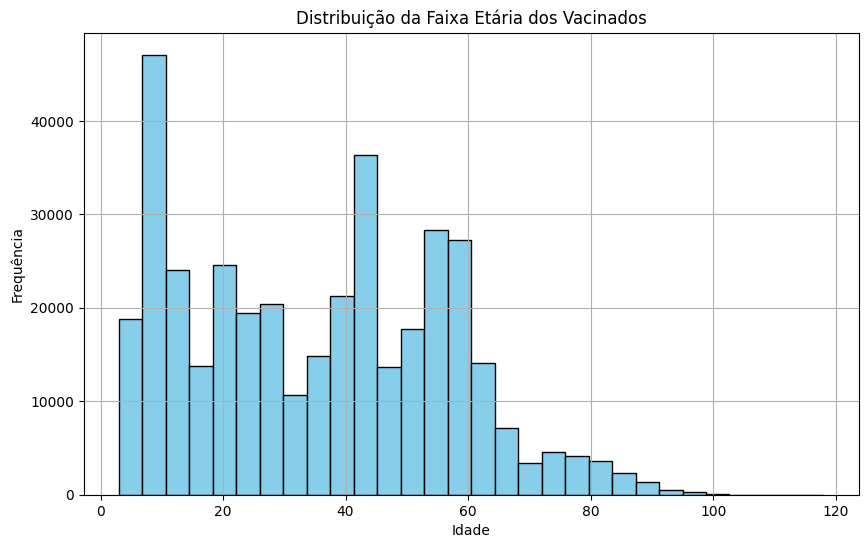

Estatísticas da Faixa Etária:
Média de Idade: 35.43342392019929
Mediana de Idade: 37.0
Desvio Padrão de Idade: 20.996147081546784


In [26]:
#Estatísticas da faixa etária
media_idade= df ['idade'].mean()
mediana_idade= df['idade'].median()
desvio_padrao_idade= df['idade'].std()

plt.figure(figsize=(10, 6))
plt.hist(df['idade'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição da Faixa Etária dos Vacinados')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

print("Estatísticas da Faixa Etária:")
print("Média de Idade:", media_idade)
print("Mediana de Idade:", mediana_idade)
print("Desvio Padrão de Idade:", desvio_padrao_idade)

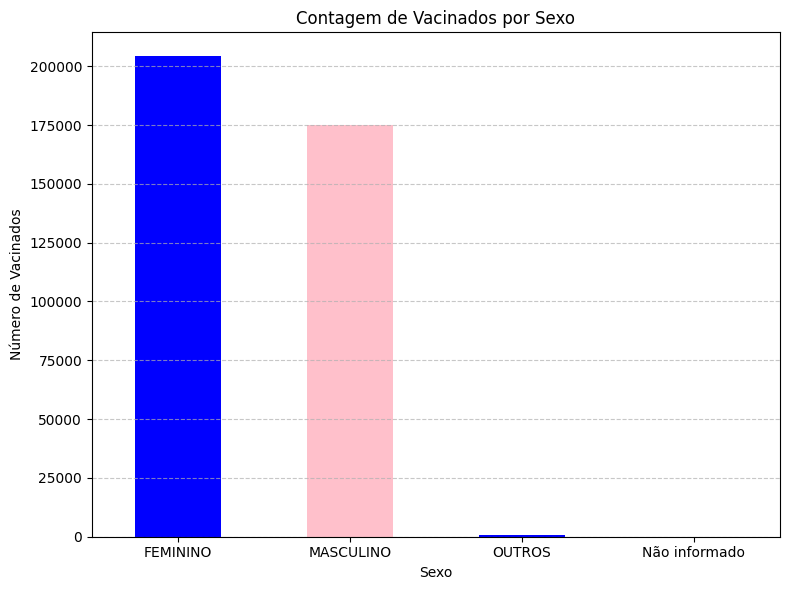

Contagem de Vacinados por Sexo:
sexo
FEMININO         204197
MASCULINO        174981
OUTROS              561
Não informado         7
Name: count, dtype: int64

Proporção de Vacinados por Sexo:
sexo
FEMININO         0.537720
MASCULINO        0.460784
OUTROS           0.001477
Não informado    0.000018
Name: proportion, dtype: float64


In [27]:
# Contagem de vacinados por sexo
contagem_sexo = df['sexo'].value_counts()

# Proporção de vacinados por sexo
proporcao_sexo = df['sexo'].value_counts(normalize=True)

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
contagem_sexo.plot(kind='bar', color=['blue', 'pink'])
plt.title('Contagem de Vacinados por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Vacinados')
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Contagem de Vacinados por Sexo:")
print(contagem_sexo)
print("\nProporção de Vacinados por Sexo:")
print(proporcao_sexo)

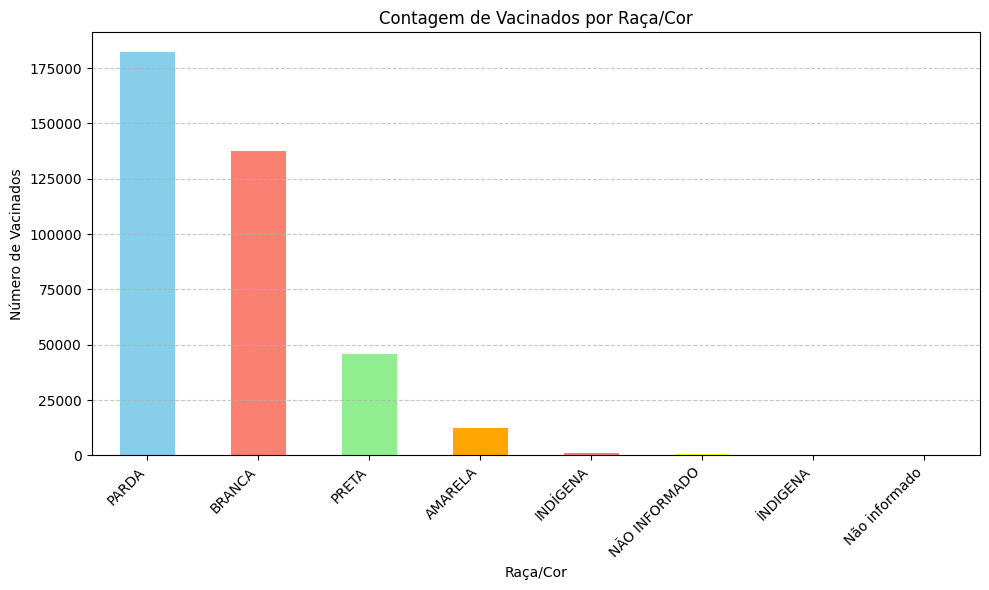

Contagem de Vacinados por Raça/Cor:
raca_cor
PARDA            182034
BRANCA           137735
PRETA             45696
AMARELA           12408
INDÍGENA            922
NÃO INFORMADO       581
ÍNDIGENA            299
Não informado        71
Name: count, dtype: int64

Proporção de Vacinados por Raça/Cor:
raca_cor
PARDA            0.479357
BRANCA           0.362703
PRETA            0.120333
AMARELA          0.032674
INDÍGENA         0.002428
NÃO INFORMADO    0.001530
ÍNDIGENA         0.000787
Não informado    0.000187
Name: proportion, dtype: float64


In [28]:
# Contagem de vacinados por raça/cor
contagem_raca_cor = df['raca_cor'].value_counts()

# Proporção de vacinados por raça/cor
proporcao_raca_cor = df['raca_cor'].value_counts(normalize=True)

# Cores para cada categoria de raça/cor
cores = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'yellow', 'purple']


# Plotando o gráfico de barras com cores diferentes para cada categoria
plt.figure(figsize=(10, 6))
contagem_raca_cor.plot(kind='bar', color=cores)
plt.title('Contagem de Vacinados por Raça/Cor')
plt.xlabel('Raça/Cor')
plt.ylabel('Número de Vacinados')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Contagem de Vacinados por Raça/Cor:")
print(contagem_raca_cor)
print("\nProporção de Vacinados por Raça/Cor:")
print(proporcao_raca_cor)

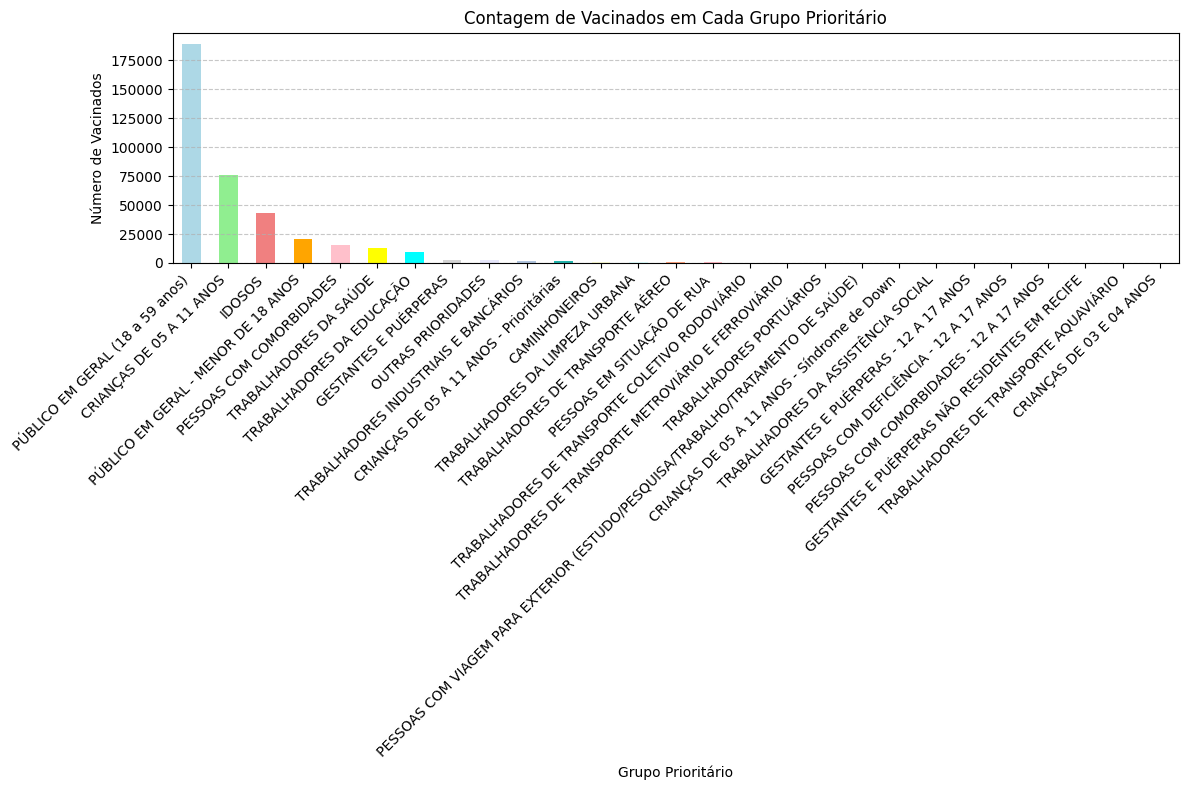

Contagem de Vacinados em Cada Grupo Prioritário:
grupo
PÚBLICO EM GERAL (18 a 59 anos)                                                    189415
CRIANÇAS DE 05 A 11 ANOS                                                            76267
IDOSOS                                                                              42750
PÚBLICO EM GERAL - MENOR DE 18 ANOS                                                 20271
PESSOAS COM COMORBIDADES                                                            15312
TRABALHADORES DA SAÚDE                                                              13266
TRABALHADORES DA EDUCAÇÃO                                                            9088
GESTANTES E PUÉRPERAS                                                                2938
OUTRAS PRIORIDADES                                                                   2655
TRABALHADORES INDUSTRIAIS E BANCÁRIOS                                                2075
CRIANÇAS DE 05 A 11 ANOS - Prioritárias      

In [29]:
# Contagem de vacinados em cada grupo prioritário
contagem_grupo = df['grupo'].value_counts()

# Proporção de vacinados em cada grupo prioritário
proporcao_grupo = df['grupo'].value_counts(normalize=True)

# Calculando a porcentagem que cada grupo representa em relação ao total
porcentagem_grupo = proporcao_grupo * 100


# Cores para cada grupo prioritário
cores = ['lightblue', 'lightgreen', 'lightcoral', 'orange', 'pink', 'yellow', 'cyan', 'lightgrey', 'lavender',
         'lightsteelblue', 'lightseagreen', 'lightgoldenrodyellow', 'lightcyan', 'lightsalmon', 'lightpink',
         'lightyellow', 'lightcoral', 'lightgreen', 'lightblue', 'lightskyblue']



# Plotando o gráfico de barras com cores diferentes para cada categoria
plt.figure(figsize=(12, 8))  # Aumentando o tamanho do gráfico
contagem_grupo.plot(kind='bar', color=cores)
plt.title('Contagem de Vacinados em Cada Grupo Prioritário')
plt.xlabel('Grupo Prioritário')
plt.ylabel('Número de Vacinados')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotaciona e ajusta o tamanho dos rótulos do eixo x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Imprimindo as contagens e proporções de vacinados em cada grupo prioritário
print("Contagem de Vacinados em Cada Grupo Prioritário:")
print(contagem_grupo)
print("\nProporção de Vacinados em Cada Grupo Prioritário:")
print(proporcao_grupo)

# Imprimindo a porcentagem que cada grupo representa em relação ao total
print("\nPorcentagem de Vacinados em Cada Grupo Prioritário:")
print(porcentagem_grupo)

In [30]:
# Contagem para saber os nomes dos municípios que existem
municipios_unicos = df['municipio'].unique()
print("Municípios presentes no dataset:")
print(municipios_unicos)

Municípios presentes no dataset:
['RECIFE' 'JABOATÃO DOS GUARARAPES' 'OLINDA' 'PAULISTA' 'IPOJUCA'
 'MONTE MOR' 'JOÃO PESSOA' 'IGARASSU' 'CAMARAGIBE' 'MACEIÓ'
 'SÃO LOURENÇO DA MATA' 'UNIÃO DOS PALMARES' 'MORENO'
 'CABO DE SANTO AGOSTINHO' 'CASINHAS' 'RIO DE JANEIRO' 'ABREU E LIMA'
 'SÃO PAULO' 'PAUDALHO' 'VITÓRIA DE SANTO ANTÃO' 'CURITIBA'
 'BARRA DE GUABIRABA' 'ITAPISSUMA' 'TIMON' 'PRAZERES' 'XANXERÊ' 'NATAL'
 'SÃO JOAQUIM DO MONTE' 'TIMBAÚBA' 'NATUBA' 'CARUARU' 'BONITO'
 'MORADA NOVA' 'ARAÇOIABA' 'CATENDE' 'PATOS' 'POÇO BRANCO' 'SALVADOR'
 'MANAUS' 'GRAVATÁ' 'NOSSA SENHORA DO SOCORRO' 'GOIANA' 'IBIRAJUBA'
 'MIRANDIBA' 'FEIRA NOVA' 'ESCADA' 'CAMOCIM DE SÃO FÉLIX' 'CONDADO'
 'RIBEIRÃO PRETO' 'GARANHUNS' 'PARNAMIRIM' 'CORURIPE' 'BOM JARDIM'
 'ARACAJU' 'CABO' 'IGUARACI' 'PASSIRA' 'CARPINA' 'JABOATAO' 'JANDAÍRA'
 'CUPIRA' 'PETROLINA' 'BELO HORIZONTE' 'ILHA DE ITAMARACÁ' 'LAJEDO'
 'SÃO LOURENÇO' 'LAGOA DOS GATOS' 'XAPURI' 'BELO JARDIM' 'FORTALEZA'
 'ÁLVARES MACHADO' 'CAMPINA GRANDE' 'PALM

In [31]:
# Contagem por número de município
contagem_por_municipio = df['municipio'].value_counts()

# Exibir a contagem por município
print(contagem_por_municipio)

# Transformar a série em um DataFrame para facilitar a manipulação
municipio_df_filtrado = contagem_por_municipio.reset_index()
municipio_df_filtrado.columns = ['Município', 'Quantidade']

# Criar a tabela de texto
tabela_texto = tabulate(municipio_df_filtrado, headers='keys', tablefmt='pretty', showindex=False)

# Exibir a tabela
print(tabela_texto)

municipio
RECIFE                     369777
JABOATÃO DOS GUARARAPES      3433
OLINDA                       2914
PAULISTA                     1270
CAMARAGIBE                    595
                            ...  
ESTÂNCIA VELHA                  1
CANOAS                          1
VERTENTE DO LÉRIO               1
SÃO JOSÉ DO RIO PRETO           1
SERRARIA                        1
Name: count, Length: 303, dtype: int64
+------------------------------+------------+
|          Município           | Quantidade |
+------------------------------+------------+
|            RECIFE            |   369777   |
|   JABOATÃO DOS GUARARAPES    |    3433    |
|            OLINDA            |    2914    |
|           PAULISTA           |    1270    |
|          CAMARAGIBE          |    595     |
|         ABREU E LIMA         |    199     |
|     SÃO LOURENÇO DA MATA     |    190     |
|   CABO DE SANTO AGOSTINHO    |    154     |
|           IGARASSU           |    125     |
|            MORENO      

In [32]:
# Dados das cidades com suas respectivas coordenadas
data = {'RECIFE': (-8.0584933, -34.8848193), 'JABOATÃO DOS GUARARAPES': (-8.1752476, -34.9468716), 'OLINDA': (-7.9986401, -34.8459552), 'PAULISTA': (-7.9340069, -34.868407), 'IPOJUCA': (-8.3980773, -35.0611068), 'MONTE MOR': (-22.945043, -47.312182), 'JOÃO PESSOA': (-7.1215981, -34.882028), 'IGARASSU': (-7.8354423, -34.9061125), 'CAMARAGIBE': (-8.0213832, -34.9810768), 'MACEIÓ': (-9.6476843, -35.7339264), 'SÃO LOURENÇO DA MATA': (-7.9959607, -35.039335), 'UNIÃO DOS PALMARES': (-9.1576807, -36.0342251), 'MORENO': (-34.6396556, -58.7898326), 'CABO DE SANTO AGOSTINHO': (-8.2838945, -35.0320984), 'CASINHAS': (-7.744698, -35.7250923), 'RIO DE JANEIRO': (-22.9110137, -43.2093727), 'ABREU E LIMA': (-7.900719, -34.898389), 'SÃO PAULO': (-23.5506507, -46.6333824), 'PAUDALHO': (-7.90287, -35.171639), 'VITÓRIA DE SANTO ANTÃO': (-8.1209019, -35.2944858), 'CURITIBA': (-25.4295963, -49.2712724), 'BARRA DE GUABIRABA': (-8.4173522, -35.6626669), 'ITAPISSUMA': (-7.767983, -34.897136), 'TIMON': (-5.1004341, -42.8312018), 'PRAZERES': (38.7067848, -9.167511127888423), 'XANXERÊ': (-26.8748603, -52.4035964), 'NATAL': (-5.805398, -35.2080905), 'SÃO JOAQUIM DO MONTE': (-8.4323653, -35.8076179), 'TIMBAÚBA': (-7.5118822, -35.316076), 'NATUBA': (-7.6410756, -35.5542731), 'CARUARU': (-8.2829702, -35.9722852), 'BONITO': (41.09772, 15.001344), 'MORADA NOVA': (-5.1076699, -38.3727852), 'ARAÇOIABA': (-7.7856903, -35.0898881), 'CATENDE': (-8.6900588, -35.74847081375707), 'PATOS': (-7.0258285, -37.2766817), 'POÇO BRANCO': (-5.6224378, -35.6615774), 'SALVADOR': (13.8000382, -88.9140683), 'MANAUS': (-3.1316333, -59.9825041), 'GRAVATÁ': (-8.1993049, -35.5631137), 'NOSSA SENHORA DO SOCORRO': (-10.8553115, -37.1264863), 'GOIANA': (-7.560603, -34.99591), 'IBIRAJUBA': (-8.5795521, -36.178045), 'MIRANDIBA': (-8.1202103, -38.728459), 'FEIRA NOVA': (-7.9481471, -35.3871681), 'ESCADA': (-8.3623847, -35.2366232), 'CAMOCIM DE SÃO FÉLIX': (-8.3616757, -35.7638903), 'CONDADO': (-6.9092101, -37.5966375), 'RIBEIRÃO PRETO': (-21.1776315, -47.8100983), 'GARANHUNS': (-8.8905889, -36.4930896), 'PARNAMIRIM': (-5.9153334, -35.2679913), 'CORURIPE': (-10.1249963, -36.1760623), 'BOM JARDIM': (-3.54129, -45.606004), 'ARACAJU': (-10.9162061, -37.0774655), 'CABO': (-8.2838945, -35.0320984), 'IGUARACI': (-7.8352247, -37.5190066), 'PASSIRA': (-7.976317, -35.5817327), 'CARPINA': (-7.8459105, -35.2538861), 'JABOATAO': (-8.1752476, -34.9468716), 'JANDAÍRA': (-11.5628009, -37.7820255), 'CUPIRA': (-8.6053148, -35.9530366), 'PETROLINA': (-9.3817334, -40.4968875), 'BELO HORIZONTE': (-19.9227318, -43.9450948), 'ILHA DE ITAMARACÁ': (-7.747664, -34.830319), 'LAJEDO': (-8.657914, -36.329336), 'SÃO LOURENÇO': (-22.116389, -45.054167), 'LAGOA DOS GATOS': (-8.6537614, -35.9045124), 'XAPURI': (-10.6511174, -68.5017902), 'BELO JARDIM': (-8.3338293, -36.4176419), 'FORTALEZA': (-3.7304512, -38.5217989), 'ÁLVARES MACHADO': (-22.076415, -51.47224), 'CAMPINA GRANDE': (-7.2246743, -35.8771292), 'PALMARES': (-8.684226, -35.589032), 'IBURA': (-8.1223529, -34.9321458), 'QUIPAPÁ': (-8.8269434, -36.011622), 'TRACUNHAÉM': (-7.8027253, -35.238498), 'AFOGADOS DA INGAZEIRA': (-7.7481283, -37.6346614), 'FLORIANÓPOLIS': (-27.5973002, -48.5496098), 'ARARIPINA': (-7.5768582, -40.5038509), 'VITÓRIA DA CONQUISTA': (-14.8567487, -40.8414804), 'SIRINHAÉM': (-8.591935, -35.1155161), 'BUENOS AIRES': (-34.6037181, -58.38153), 'SÃO JOSÉ DO BELMONTE': (-7.8641261, -38.7599545), 'LIMOEIRO': (-7.872599, -35.440154), 'LAGOA DE ITAENGA': (-7.9335596, -35.2919789), 'GLÓRIA DO GOITÁ': (-7.999959, -35.2866116), 'AMARAJI': (-8.373925, -35.4536527), 'OROBÓ': (-7.74562, -35.6019195), 'ARCOVERDE': (-8.415192, -37.057748), 'ITAMBÉ': (-15.2435245, -40.6269506), 'LAGOA DO ITAENGA': (-23.4800374, -46.5776843), 'NITERÓI': (-22.8884, -43.1147), 'SENHOR DO BONFIM': (-10.4602509, -40.189151), 'MACAU': (22.1899448, 113.5380454), 'SÃO MIGUEL DOS CAMPOS': (-9.7831115, -36.0967804), 'JUREMA': (-8.7189103, -36.137365), 'BEZERROS': (-8.2372132, -35.7558262), 'CUSTÓDIA': (-8.0860251, -37.6400307), 'GUARANTÃ DO NORTE': (-9.9517992, -54.9098178), 'GAMELEIRA': (-8.579803, -35.384573), 'SANTOS DUMONT': (-21.455867, -43.5522107), 'DUQUE DE CAXIAS': (-22.7896225, -43.309929), 'NAZARÉ DA MATA': (-7.7452689, -35.2286396), 'BAYEUX': (49.2764624, -0.7024738), 'SURUBIM': (-7.8424353, -35.7539722), 'CAMPO GRANDE': (-20.4640173, -54.6162947), 'SAIRÉ': (-8.3277815, -35.7094611), 'BRASÍLIA': (-10.3333333, -53.2), 'BOM JESUS': (-28.6692723, -50.4346894), 'OURO BRANCO': (-6.703294, -36.9429599), 'SORRISO': (-12.5444887, -55.7233972), 'SÃO LUÍS': (-2.5295265, -44.2963942), 'IMPERATRIZ': (-5.5269279, -47.478115), 'SÃO BERNARDO DO CAMPO': (-23.7080345, -46.5506747), 'AMARGOSA': (-13.0302189, -39.6040692), 'ALTOS': (-5.0393915, -42.4611694), 'OROCÓ': (-8.6147578, -39.6036988), 'MACAPARANA': (-7.555638, -35.44246), 'CAMPO NOVO DO PARECIS': (-13.658735, -57.890723), 'CARAPICUÍBA': (-23.5234673, -46.8406808), 'MORRO DO CHAPÉU': (-11.5500293, -41.1570248), 'MAUÁ': (-23.6669527, -46.4616922), 'ITABAIANA': (-7.3299566, -35.3359995), 'BELÉM DO SÃO FRANCISCO': (-8.7517707, -38.9625715), 'DIADEMA': (-23.6866428, -46.6246935), 'MARANGUAPE': (-3.8922967, -38.6835427), 'BALNEÁRIO GAIVOTA': (-29.1553098, -49.5808712), 'SANTA MARIA DO CAMBUCÁ': (-7.8328155, -35.882795), 'SARANDI': (-27.942, -52.923085), 'TEIXEIRA DE FREITAS': (-17.5384774, -39.7451701), 'SÃO MATEUS': (-18.7146049, -39.8539499), 'BARREIROS': (-8.8159644, -35.1831905), 'TRÊS LAGOAS': (-20.7866799, -51.7061247), 'CATALÃO': (-18.1702546, -47.9447082), 'RIBEIRÃO': (-8.5066761, -35.3747339), 'ALHANDRA': (-7.4304246, -34.9106103), 'SÃO VICENTE FERRER': (-2.8927449, -44.8803633), 'GUARULHOS': (-23.4675941, -46.5277704), 'SÃO GONÇALO': (-22.8219014, -43.0309252), 'LAVRAS': (-21.2425512, -44.9991978), 'FRANCISCO MORATO': (-23.2817308, -46.7448996), 'CUMARU': (-8.0065285, -35.6991651), 'TEFÉ': (-3.3485276, -64.7102278), 'SÃO MATEUS DO MARANHÃO': (-4.0289169, -44.4667342), 'PORTO CALVO': (-9.051948, -35.398653), 'MACHADOS': (-7.6876999, -35.5126635), 'JOÃO NEIVA': (-19.7570307, -40.3856633), 'ALIANÇA': (-7.6026425, -35.2263514), 'PITIMBU': (-7.4728063, -34.811233), 'MACAÉ': (-22.28283055, -41.96490906592897), 'ÁGUA PRETA': (-8.7079109, -35.5198586), 'JUPI': (-8.7114677, -36.417448), 'SOBRADINHO': (-29.4131826, -53.0256794), 'TABIRA': (-7.583661, -37.537735), 'UMBUZEIRO': (-7.696494, -35.6666231), 'TOBIAS BARRETO': (-11.1878721, -38.0030397), 'GUARUJÁ': (-23.9927768, -46.2558332), 'GADO BRAVO': (-7.5830516, -35.7914371), 'PARAUAPEBAS': (-6.0696846, -49.8903283), 'SANTA CRUZ DO CAPIBARIBE': (-7.948019, -36.206092), 'SALGADINHO': (-7.1024779, -36.8446805), 'EMBU DAS ARTES': (-23.6495294, -46.8528497), 'XEXÉU': (-8.8036743, -35.6244442), 'SERTÂNIA': (-8.068467, -37.268393), 'CARNAÚBA DOS DANTAS': (-6.5560588, -36.5930811), 'MONTEIRO': (-7.8920179, -37.1232051), 'ITAPECERICA DA SERRA': (-23.7176303, -46.8492435), 'POMBOS': (-8.1398585, -35.396437), 'AIUABA': (-6.5710836, -40.1212278), 'CAMPINAS': (-22.9056391, -47.059564), 'ESTÂNCIA VELHA': (-29.6529666, -51.1719687), 'CANOAS': (-29.9216045, -51.1799525), 'VERTENTE DO LÉRIO': (-7.7733359, -35.8498482), 'SÃO JOSÉ DO RIO PRETO': (-20.8125851, -49.3804212), 'CAMPESTRE': (-8.8481634, -35.5660033), 'SÃO BENEDITO DO SUL': (-8.8107294, -35.9334035), 'MARAIAL': (-8.7823791, -35.8113151), 'GRAMADO': (-29.3792858, -50.8737019), 'MOGEIRO': (-7.3019003, -35.4782749), 'CAUCAIA': (-3.7300563, -38.6593082), 'MARAGOGI': (-9.0118278, -35.222512), 'PAULO LOPES': (-27.964968, -48.6830299), 'BOA VISTA': (2.8208478, -60.6719582), 'PORTO VELHO': (-8.7494525, -63.8735438), 'RIO FORMOSO': (-8.6606291, -35.1550736), 'REBOUÇAS': (-25.6259339, -50.6946598), 'SALGUEIRO': (-8.0726731, -39.1269719), 'IPUBI': (-7.6535334, -40.1494078), 'JOÃO ALFREDO': (-7.8608755, -35.591575), 'TERESINA': (-5.0874608, -42.8049571), 'JAQUEIRA': (-8.7276422, -35.7948925), 'ALMEIRIM': (39.2107506, -8.6340173), 'CAMPO MAIOR': (-4.8339574, -42.1739786), 'ITABUNA': (-14.793173, -39.2750341), 'PATOS DE MINAS': (-18.6041453, -46.5096698), 'TAMANDARÉ': (-8.7500009, -35.1045787), 'FERNANDO DE NORONHA': (-3.8548681, -32.42089413898326), 'PARAÍSO DO TOCANTINS': (-10.1752474, -48.886759), 'SÃO JOSÉ DA COROA GRANDE': (-8.889375, -35.151461), 'SERRA TALHADA': (-7.9867805, -38.2920294), 'PALMEIRA DOS ÍNDIOS': (-9.4076249, -36.6323616), 'PETROLÂNDIA': (-27.5329615, -49.6984597), 'VILA VELHA': (-20.3297037, -40.2920174), 'SIMÕES FILHO': (-12.7867839, -38.4030365), 'PICOS': (-7.0823544, -41.4685053), 'BARUERI': (-23.5112184, -46.8764612), 'SÃO JOSÉ DO EGITO': (-7.469447, -37.273974), 'GUARAPUAVA': (-25.3950986, -51.4622016), 'GOIÂNIA': (-16.680882, -49.2532691), 'CAAPORÃ': (-7.510234, -34.9154114), 'LUIS EDUARDO MAGALHÃES BAHIA': (-12.0869117, -45.7834163), 'PONTA GROSSA': (-25.0891685, -50.1601812), 'OURO PRETO': (-20.385527, -43.5035214), 'LUÍS EDUARDO MAGALHÃES': (-12.0869117, -45.7834163), 'BACABAL/ MARANHÃO': (-4.2318132, -44.781167), 'LAGOA DO CARRO': (-7.843834, -35.310783), 'SANTO ANTÔNIO DE LISBOA': (-6.9831426, -41.2283884), 'FLORES': (-8.50998605, 120.59815014764581), 'POÁ': (-23.5249082, -46.3445663), 'LINDÓIA DO SUL': (-27.0520334, -52.0831975), 'TORITAMA': (-8.0083743, -36.058776), 'BREJÃO': (-9.029146, -36.566034), 'VICÊNCIA': (-7.6574422, -35.3218464), 'SANTANA': (-12.979217, -44.05064), 'CANHOTINHO': (-8.876519, -36.197935), 'ÁGUAS BELAS': (-9.1113156, -37.1225218), 'URUGUAIANA': (-29.7560726, -57.0867546), 'NOVA IGUAÇU': (-22.7592175, -43.4508728), 'PESQUEIRA': (-8.3574471, -36.6968238), 'CARAÍ': (-17.1884104, -41.6976554), 'SANTO AGOSTINHO': (-8.29479245, -34.985162914367436), 'PAULO AFONSO': (-9.3991006, -38.226711), 'ARAPIRACA': (-9.754866, -36.661471), 'AMERICANA': (-22.7392463, -47.3306032), 'TAQUARITINGA DO NORTE': (-7.9027766, -36.0442227), 'CARNAÍBA': (-7.805964, -37.7947314), 'SÃO MIGUEL DO GOSTOSO': (-5.1230207, -35.6353882), 'ALTO DO PROGRESSO': (-8.0921425, -34.9669807), 'XEXEU': (-8.8036743, -35.6244442), 'MOGI DAS CRUZES': (-23.5234284, -46.1926671), 'JABOATAO DOS GUARARAPES': (-8.1752476, -34.9468716), 'NOSSA SENHORA DO Ó': (-8.47205915, -35.0103061513458), 'CUSTODIA': (-2.2497735, -54.868995), 'BUÍQUE': (-8.6239732, -37.157296), 'JUIZ DE FORA': (-21.7609533, -43.3501129), 'OSASCO': (-23.5324859, -46.7916801), 'NOVA DESCOBERTA': (-27.2627411, -48.7288874), 'BRASÍLIA-DF': (-15.7934036, -47.8823172), 'SERRA DE SÃO BENTO': (-6.4169271, -35.70478), 'ATIBAIA': (-23.1177393, -46.5547861), 'SANTARÉM': (39.2363637, -8.6867081), 'COTIA': (-23.603889, -46.918889), 'ITACURUBA': (-8.7267879, -38.6868835), 'SUMARÉ': (-22.8217964, -47.267105), 'MOSSORÓ': (-5.1904332, -37.3443872), 'CODÓ': (-4.455623, -43.892354), 'GOIÂNIA, GO': (-16.680882, -49.2532691), 'BACABAL': (-4.2318132, -44.781167), 'BELÉM': (-1.45056, -48.4682453), 'PONTA PORÃ': (-22.5286917, -55.723426), 'CAPINÓPOLIS': (-18.682778, -49.569723), 'SÃO CAETANO DO SUL': (-23.6195923, -46.5688323), 'JUAZEIRO DO NORTE': (-7.2153453, -39.3153336), 'LONDRINA': (-23.3112878, -51.1595023), 'FRANCO DA ROCHA': (-23.3328038, -46.724446), 'FRUTAL': (-20.0220064, -48.9280076), 'SÃO VICENTE': (-23.9664177, -46.3861401), 'LENÇÓIS PAULISTA': (-22.6029897, -48.8031367), 'VALINHOS': (-22.97056, -46.99583), 'ANICUNS': (-16.4606451, -49.9572265), 'INDAIATUBA': (-23.0908356, -47.2180677), 'PALMAS': (44.39975905, 2.8433617206815267), 'PIRACICABA': (-22.739807499999998, -47.66800924997932), 'HORTOLÂNDIA': (-22.8620175, -47.2164219), 'ITAPEVI': (-23.54888, -46.933889), 'CARAGUATATUBA': (-23.62028, -45.41306), 'NOVO HAMBURGO': (-29.6905705, -51.1429035), 'SANTO ANDRÉ': (-23.6533509, -46.5279039), 'BRUMADO': (-14.2025099, -41.6701307), 'CAMARAJIBE': (-8.595585, -35.1545122998962), 'ITAJUBÁ': (-22.4238234, -45.4524156), 'ILHÉUS': (-14.792599, -39.0453843), 'PORTO ALEGRE': (-30.0324999, -51.2303767), 'SOLIDÃO': (-7.6008705, -37.6514396), 'JIJOCA DE JERICOACOARA': (-2.8986278, -40.4506081), 'MACAPÁ': (0.0401529, -51.0569588), 'UNIÃO': (-4.5892553, -42.8593348), 'JUAZEIRO': (-9.4336959, -40.5068201), 'ANGELIM': (-8.8902038, -36.2872987), 'FOZ DO IGUAÇU': (-25.5401479, -54.5858139), 'CAICÓ/ RIO GRANDE DO NORTE': (-6.4594544, -37.0971911), 'PRIMAVERA DO LESTE': (-15.5614127, -54.2993946), 'ITAJAÍ': (-26.9046787, -48.6552979), 'ARACATI': (-4.558259, -37.767894), 'PANELAS': (-8.661211, -36.012539), 'JABOATÃO': (-8.1752476, -34.9468716), 'JOINVILLE': (48.4433253, 5.1377537), 'CUBATÃO': (-23.8857982, -46.4241869), 'COLÔNIA LEOPOLDINA': (-8.9144649, -35.7220255), 'BOM JESUS DO TOCANTINS': (-5.0471796, -48.5978362), 'SERRARIA': (-6.8193129, -35.6387473)}

def get_weight(city_name):
    # Lógica para calcular o peso de cada município
    # Número de vacinados por município


    weights= {'RECIFE': 369777, 'JABOATÃO DOS GUARARAPES': 3433, 'OLINDA': 2914, 'PAULISTA': 1270, 'CAMARAGIBE': 595, 'ABREU E LIMA': 199, 'SÃO LOURENÇO DA MATA': 190, 'CABO DE SANTO AGOSTINHO': 154, 'IGARASSU': 125, 'MORENO': 55, 'SÃO PAULO': 54, 'VITÓRIA DE SANTO ANTÃO': 30, 'JOÃO PESSOA': 25, 'IPOJUCA': 24, 'RIO DE JANEIRO': 23, 'CARUARU': 21, 'MACEIÓ': 21, 'PAUDALHO': 21, 'SURUBIM': 20, 'GRAVATÁ': 20, 'CARPINA': 19, 'BRASÍLIA': 17, 'ESCADA': 17, 'PETROLINA': 16, 'GARANHUNS': 16, 'GOIANA': 16, 'FORTALEZA': 15, 'ILHA DE ITAMARACÁ': 15, 'NATAL': 15, 'LIMOEIRO': 13, 'BOM JARDIM': 13, 'CONDADO': 13, 'SALVADOR': 12, 'TIMBAÚBA': 11, '4': 11, 'NAZARÉ DA MATA': 11, 'MANAUS': 10, 'BELO HORIZONTE': 10, 'BUENOS AIRES': 10, 'SIRINHAÉM': 9, 'BARREIROS': 9, 'ARACAJU': 8, 'CAMPINA GRANDE': 8, 'PASSIRA': 8, 'PARNAMIRIM': 8, 'LAGOA DO ITAENGA': 7, 'JUREMA': 7, 'PALMARES': 6, 'GLÓRIA DO GOITÁ': 6, 'CURITIBA': 6, 'LAJEDO': 6, 'JABOATAO': 6, 'FEIRA NOVA': 6, 'OROBÓ': 5, '3': 5, 'BEZERROS': 5, 'SÃO BERNARDO DO CAMPO': 5, 'FERNANDO DE NORONHA': 5, 'MACAPARANA': 5, 'RIBEIRÃO': 5, 'ITAMBÉ': 5, 'ARAÇOIABA': 5, 'ARCOVERDE': 4, 'TRACUNHAÉM': 4, 'CAMPINAS': 4, 'BOA VISTA': 4, 'ALIANÇA': 4, 'RIBEIRÃO PRETO': 4, 'JOÃO ALFREDO': 4, '2': 4, 'AMARAJI': 3, 'VICÊNCIA': 3, 'ITAPEVI': 3, 'SÃO MIGUEL DOS CAMPOS': 3, 'SÃO LUÍS': 3, 'BELÉM': 3, 'IMPERATRIZ': 3, '5': 3, 'FLORIANÓPOLIS': 3, 'PATOS': 3, 'NATUBA': 3, 'MARAGOGI': 3, 'BONITO': 3, 'LAGOA DOS GATOS': 3, 'TERESINA': 3, 'TAMANDARÉ': 3, 'BARRA DE GUABIRABA': 3, 'SERRA TALHADA': 3, 'NOSSA SENHORA DO SOCORRO': 3, 'ITAPISSUMA': 3, 'SUMARÉ': 2, 'COTIA': 2, 'ÁGUA PRETA': 2, 'BARUERI': 2, 'PICOS': 2, 'NOSSA SENHORA DO Ó': 2, 'SÃO JOSÉ DA COROA GRANDE': 2, 'CODÓ': 2, 'TORITAMA': 2, 'PESQUEIRA': 2, 'GUARULHOS': 2, 'SÃO VICENTE FERRER': 2, 'TRÊS LAGOAS': 2, 'NOVA IGUAÇU': 2, 'FLORES': 2, 'CANHOTINHO': 2, 'ATIBAIA': 2, 'SANTO AGOSTINHO': 2, 'SÃO BENEDITO DO SUL': 2, 'MOGI DAS CRUZES': 2, 'CARNAÍBA': 2, 'PORTO VELHO': 2, 'REBOUÇAS': 2, 'SÃO VICENTE': 2, 'POMBOS': 2, 'MONTEIRO': 2, 'SERTÂNIA': 2, 'SALGUEIRO': 2, 'IPUBI': 2, 'XEXÉU': 2, 'SALGADINHO': 2, 'SANTA CRUZ DO CAPIBARIBE': 2, 'GADO BRAVO': 2, 'CAMPESTRE': 2, 'SERRA DE SÃO BENTO': 2, 'TEIXEIRA DE FREITAS': 2, 'LAGOA DO CARRO': 2, 'SAIRÉ': 2, 'TIMON': 2, 'GAMELEIRA': 2, 'SANTOS DUMONT': 2, 'DUQUE DE CAXIAS': 2, 'SANTO ANDRÉ': 2, 'CAMPO GRANDE': 2, 'JABOATÃO': 2, 'CABO': 2, 'CATENDE': 2, 'NITERÓI': 2, 'SÃO JOAQUIM DO MONTE': 2, 'CUPIRA': 2, 'CORURIPE': 2, 'CAMPO NOVO DO PARECIS': 2, 'PRAZERES': 2, 'UNIÃO DOS PALMARES': 2, 'BELO JARDIM': 2, 'CARAPICUÍBA': 2, 'MORRO DO CHAPÉU': 2, 'MAUÁ': 2, 'DIADEMA': 2, 'CASINHAS': 2, 'ARARIPINA': 2, 'ITABAIANA': 2, 'JUAZEIRO': 1, 'ARAPIRACA': 1, 'ANGELIM': 1, 'TAQUARITINGA DO NORTE': 1, 'AMERICANA': 1, 'ITAJAÍ': 1, 'FOZ DO IGUAÇU': 1, 'PRIMAVERA DO LESTE': 1, 'CAICÓ/ RIO GRANDE DO NORTE': 1, 'PAULO AFONSO': 1, 'LENÇÓIS PAULISTA': 1, 'ARACATI': 1, 'PANELAS': 1, 'ALTO DO PROGRESSO': 1, 'CARAÍ': 1, 'JOINVILLE': 1, 'CUBATÃO': 1, 'URUGUAIANA': 1, 'ÁGUAS BELAS': 1, 'COLÔNIA LEOPOLDINA': 1, 'SANTANA': 1, 'BREJÃO': 1, 'LINDÓIA DO SUL': 1, 'POÁ': 1, 'BOM JESUS DO TOCANTINS': 1, 'VENTENTES': 1, 'SÃO MIGUEL DO GOSTOSO': 1, 'SOLIDÃO': 1, 'XEXEU': 1, 'ITACURUBA': 1, 'HORTOLÂNDIA': 1, 'MOSSORÓ': 1, 'PIRACICABA': 1, 'PALMAS': 1, 'GOIÂNIA, GO': 1, 'BACABAL': 1, 'PONTA PORÃ': 1, 'CAPINÓPOLIS': 1, 'SÃO CAETANO DO SUL': 1, 'JUAZEIRO DO NORTE': 1, 'LONDRINA': 1, 'FRANCO DA ROCHA': 1, 'INDAIATUBA': 1, 'FRUTAL': 1, 'ANICUNS': 1, 'CARAGUATATUBA': 1, 'SANTO ANTÔNIO DE LISBOA': 1, 'UNIÃO': 1, 'SANTARÉM': 1, 'MACAPÁ': 1, 'JABOATAO DOS GUARARAPES': 1, 'JIJOCA DE JERICOACOARA': 1, 'VALINHOS': 1, 'CUSTODIA': 1, 'PORTO ALEGRE': 1, 'BUÍQUE': 1, 'JUIZ DE FORA': 1, 'ILHÉUS': 1, 'OSASCO': 1, 'ITAJUBÁ': 1, 'CAMARAJIBE': 1, 'NOVA DESCOBERTA': 1, 'BRUMADO': 1, 'BRASÍLIA-DF': 1, 'NOVO HAMBURGO': 1, 'TABIRA': 1, 'BACABAL/ MARANHÃO': 1, 'LUÍS EDUARDO MAGALHÃES': 1, 'BAYEUX': 1, 'BOM JESUS': 1, 'OURO BRANCO': 1, 'SORRISO': 1, 'AMARGOSA': 1, 'ALTOS': 1, 'OROCÓ': 1, 'BELÉM DO SÃO FRANCISCO': 1, 'MARANGUAPE': 1, 'BALNEÁRIO GAIVOTA': 1, 'SANTA MARIA DO CAMBUCÁ': 1, 'SARANDI': 1, 'SÃO MATEUS': 1, 'CATALÃO': 1, 'ALHANDRA': 1, 'SÃO GONÇALO': 1, 'LAVRAS': 1, 'FRANCISCO MORATO': 1, 'CUMARU': 1, 'GUARANTÃ DO NORTE': 1, 'CUSTÓDIA': 1, 'MACAU': 1, 'JANDAÍRA': 1, 'MONTE MOR': 1, 'XANXERÊ': 1, 'MORADA NOVA': 1, 'POÇO BRANCO': 1, 'IBIRAJUBA': 1, 'MIRANDIBA': 1, 'CAMOCIM DE SÃO FÉLIX': 1, 'IGUARACI': 1, 'SÃO LOURENÇO': 1, 'SENHOR DO BONFIM': 1, 'XAPURI': 1, 'ÁLVARES MACHADO': 1, 'IBURA': 1, 'QUIPAPÁ': 1, 'AFOGADOS DA INGAZEIRA': 1, 'VITÓRIA DA CONQUISTA': 1, 'SÃO JOSÉ DO BELMONTE': 1, 'LAGOA DE ITAENGA': 1, 'TEFÉ': 1, 'SÃO MATEUS DO MARANHÃO': 1, 'PORTO CALVO': 1, 'PETROLÂNDIA': 1, 'RIO FORMOSO': 1, 'JAQUEIRA': 1, 'ALMEIRIM': 1, 'CAMPO MAIOR': 1, 'ITABUNA': 1, 'PATOS DE MINAS': 1, 'PARAÍSO DO TOCANTINS': 1, 'PALMEIRA DOS ÍNDIOS': 1, 'VILA VELHA': 1, 'CAUCAIA': 1, 'SIMÕES FILHO': 1, 'SÃO JOSÉ DO EGITO': 1, 'GUARAPUAVA': 1, 'GOIÂNIA': 1, 'CAAPORÃ': 1, 'LUIS EDUARDO MAGALHÃES BAHIA': 1, 'PONTA GROSSA': 1, 'OURO PRETO': 1, 'PAULO LOPES': 1, 'MOGEIRO': 1, 'MACHADOS': 1, 'PARAUAPEBAS': 1, 'JOÃO NEIVA': 1, 'PITIMBU': 1, 'MACAÉ': 1, 'JUPI': 1, 'SOBRADINHO': 1, 'UMBUZEIRO': 1, 'TOBIAS BARRETO': 1, 'GUARUJÁ': 1, 'EMBU DAS ARTES': 1, 'GRAMADO': 1, 'CARNAÚBA DOS DANTAS': 1, 'ITAPECERICA DA SERRA': 1, 'AIUABA': 1, 'ESTÂNCIA VELHA': 1, 'CANOAS': 1, 'VERTENTE DO LÉRIO': 1, 'SÃO JOSÉ DO RIO PRETO': 1, 'MARAIAL': 1, 'SERRARIA': 1}
    return weights.get(city_name, 0)

# Lista de dados para o mapa de calor (latitude, longitude, peso)
heat_data = [(lat, lon, get_weight(city)) for city, (lat, lon) in data.items()]

# Criar um mapa de calor com base nos dados
m = folium.Map(location=[-8.0584933, -34.8848193], zoom_start=10)

# Adicionar o mapa de calor ao mapa
HeatMap(heat_data).add_to(m)

# Adicionar os ícones de seringa ao mapa
for city, (lat, lon) in data.items():
    marker = folium.Marker(location=[lat, lon],
                            icon=folium.Icon(icon='fas fa-syringe', prefix='fa', color='blue'),
                            tooltip=f"{city}: {get_weight(city)} vacinados")
    marker.add_to(m)

# Adicionar a legenda com ícones de seringa
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 200px; height: 120px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color: white;
                 ">
     &nbsp; Legenda <br>
     &nbsp; Local com Vacinação &nbsp; <i class="fas fa-syringe fa-2x" style="color:blue"></i><br>
     </div>
     '''

# Adicionar a legenda ao mapa
m.get_root().html.add_child(folium.Element(legend_html))

# Salvar o mapa como um arquivo HTML
m.save('heat_map_deus.html')

In [33]:
# Calcular estatísticas descritivas para a distribuição das datas de vacinação
primeira_data = df['data_vacinacao'].min()  # Primeira data de vacinação
ultima_data = df['data_vacinacao'].max()    # Última data de vacinação


# Imprimir as estatísticas descritivas
print("Estatísticas Descritivas para a Distribuição das Datas de Vacinação:")
print("Primeira Data de Vacinação:", primeira_data)
print("Última Data de Vacinação:", ultima_data)


Estatísticas Descritivas para a Distribuição das Datas de Vacinação:
Primeira Data de Vacinação: 2022-01-03 00:00:00
Última Data de Vacinação: 2022-12-31 00:00:00


In [34]:
# Criar uma nova coluna 'mes_vacinacao' contendo apenas o mês da data de vacinação
df['mes_vacinacao'] = df['data_vacinacao'].dt.to_period('M')

# Contar o número de vacinações por mês
vacinas_por_mes = df['mes_vacinacao'].value_counts().sort_index()

# Imprimir a quantidade de vacinações por mês
print("Quantidade de Vacinações por Mês:")
print(vacinas_por_mes)

Quantidade de Vacinações por Mês:
mes_vacinacao
2022-01    110044
2022-02     94522
2022-03     89580
2022-04     17042
2022-05      5835
2022-06     14982
2022-07     21857
2022-08      8059
2022-09      3988
2022-10      2232
2022-11      7514
2022-12      4091
Freq: M, Name: count, dtype: int64


In [35]:
# Converter a coluna 'mes_vacinacao' para formato de string contendo apenas o número do mês
df['mes_vacinacao'] = df['mes_vacinacao'].dt.strftime('%m')

# Contar o número de vacinações por mês
vacinas_por_mes = df['mes_vacinacao'].value_counts().sort_index()

# Imprimir a quantidade de vacinações por mês
print("Quantidade de Vacinações por Mês:")
print(vacinas_por_mes)

Quantidade de Vacinações por Mês:
mes_vacinacao
01    110044
02     94522
03     89580
04     17042
05      5835
06     14982
07     21857
08      8059
09      3988
10      2232
11      7514
12      4091
Name: count, dtype: int64


In [36]:
# Dicionário de mapeamento de números de meses para nomes de meses
meses_dict = {
    '01': 'Janeiro',
    '02': 'Fevereiro',
    '03': 'Março',
    '04': 'Abril',
    '05': 'Maio',
    '06': 'Junho',
    '07': 'Julho',
    '08': 'Agosto',
    '09': 'Setembro',
    '10': 'Outubro',
    '11': 'Novembro',
    '12': 'Dezembro'
}

# Substituir os números dos meses pelos seus respectivos nomes
df['mes_vacinacao'] = df['mes_vacinacao'].map(meses_dict)

# Contar o número de vacinações por mês
vacinas_por_mes = df['mes_vacinacao'].value_counts().sort_index()

# Imprimir a quantidade de vacinações por mês
print("Quantidade de Vacinações por Mês:")
print(vacinas_por_mes)

Quantidade de Vacinações por Mês:
mes_vacinacao
Abril         17042
Agosto         8059
Dezembro       4091
Fevereiro     94522
Janeiro      110044
Julho         21857
Junho         14982
Maio           5835
Março         89580
Novembro       7514
Outubro        2232
Setembro       3988
Name: count, dtype: int64


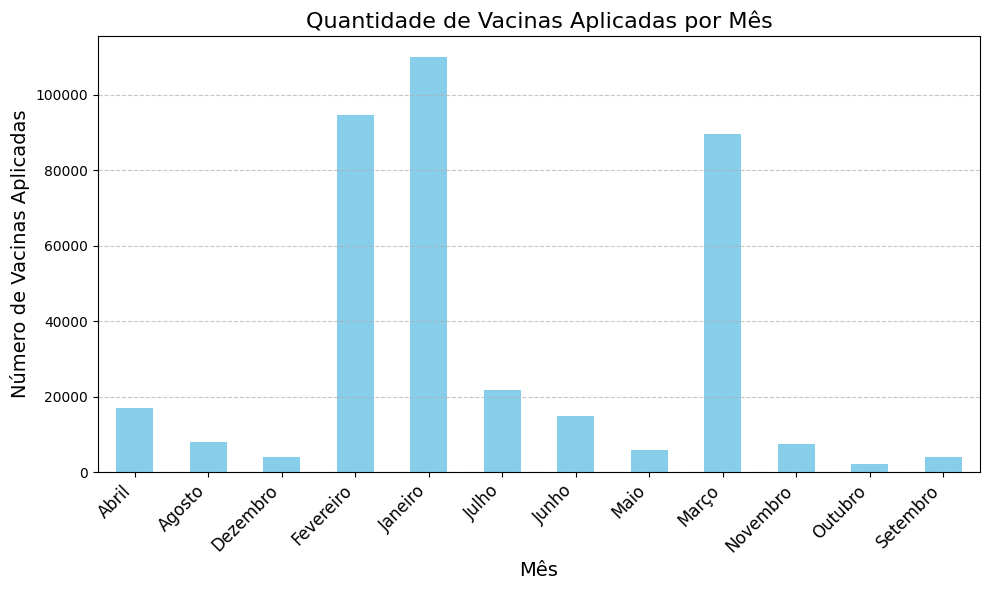

In [37]:
# Definir tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
vacinas_por_mes.plot(kind='bar', color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Vacinas Aplicadas por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Vacinas Aplicadas', fontsize=14)

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adicionar grade ao gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

## Análise da Correlação
Nesse momento iremos começar a analisar a correlação entre as variáveis do nosso dataframe

Primeiro precisamos entender que a variável para análise de correlação pode ser tanto um número inteiro quanto um número em ponto flutuante (float). A correlação é uma medida estatística que quantifica a relação entre duas variáveis numéricas, independentemente de serem inteiras ou decimais.

Tanto inteiros quanto floats são adequados para análise de correlação, mas há algumas considerações práticas que podem influenciar a escolha entre usar inteiros ou floats:

*Razões para Usar Inteiros:*

1. Simplicidade:
- Interpretação: Inteiros podem ser mais fáceis de interpretar e entender, especialmente quando representam contagens ou intervalos discretos de tempo.
- Legibilidade: Os resultados podem ser mais legíveis e intuitivos, facilitando a comunicação dos achados.

2. Eficiência Computacional:

- Desempenho: Operações com inteiros podem ser ligeiramente mais rápidas e menos exigentes em termos de memória do que com floats. Isso geralmente é um fator menor, mas pode ser relevante para grandes datasets.

3. Dados Originais:

- Fidelidade: Se os dados originais são naturalmente discretos (como dias, pessoas, eventos), representá-los como inteiros mantém essa fidelidade e evita complicações desnecessárias.

*Quando Usar Floats:*

1. Precisão:
- Detalhamento: Floats permitem capturar detalhes mais finos e precisos, especialmente quando há valores contínuos ou fracionários que são relevantes para a análise.

2. Necessidade de Precisão:
- Exatidão: Em análises onde a precisão dos valores é crucial (por exemplo, medições científicas), floats são essenciais.



Nessa análise usaremos as variáveis numéricas com os valores inteiros.

No nosso dataset existem variáveis numéricas e categóricas. Vamos transformar todas as colunas em variáveis numéricas

Podemos transformá-las com o One-Hot Encoding ou Label Encoding


In [40]:

# Seleção das colunas relevantes
selected_cols = ['idade', 'descricao_dose', 'vacina_fabricante', 'faixa_etaria', 'sexo', 'raca_cor', 'municipio', 'grupo', 'categoria', 'mes_vacinacao']

# Criar um DataFrame com as colunas selecionadas
df_selected = df[selected_cols].copy()

# Inicializar o LabelEncoder
label_encoders = {}

# Aplicar Label Encoding nas colunas categóricas
for col in ['vacina_fabricante', 'faixa_etaria', 'sexo', 'raca_cor', 'municipio', 'grupo', 'categoria', 'mes_vacinacao']:
    label_encoders[col] = LabelEncoder()
    df_selected.loc[:, col] = label_encoders[col].fit_transform(df_selected[col])

# Cálculo da matriz de correlação
corr_matrix = df_selected.corr()

print(corr_matrix)


                      idade  descricao_dose  vacina_fabricante  faixa_etaria  \
idade              1.000000        0.696386          -0.287921      0.717668   
descricao_dose     0.696386        1.000000          -0.324399      0.335094   
vacina_fabricante -0.287921       -0.324399           1.000000     -0.062621   
faixa_etaria       0.717668        0.335094          -0.062621      1.000000   
sexo              -0.054828       -0.084650           0.016452     -0.035165   
raca_cor          -0.013811       -0.044033          -0.000526     -0.035834   
municipio         -0.028127       -0.056553           0.037338      0.006533   
grupo              0.361579        0.559045          -0.383767     -0.124683   
categoria         -0.041456       -0.009102          -0.016324     -0.066828   
mes_vacinacao     -0.065668        0.109033           0.065138     -0.109141   

                       sexo  raca_cor  municipio     grupo  categoria  \
idade             -0.054828 -0.013811  -0.0281

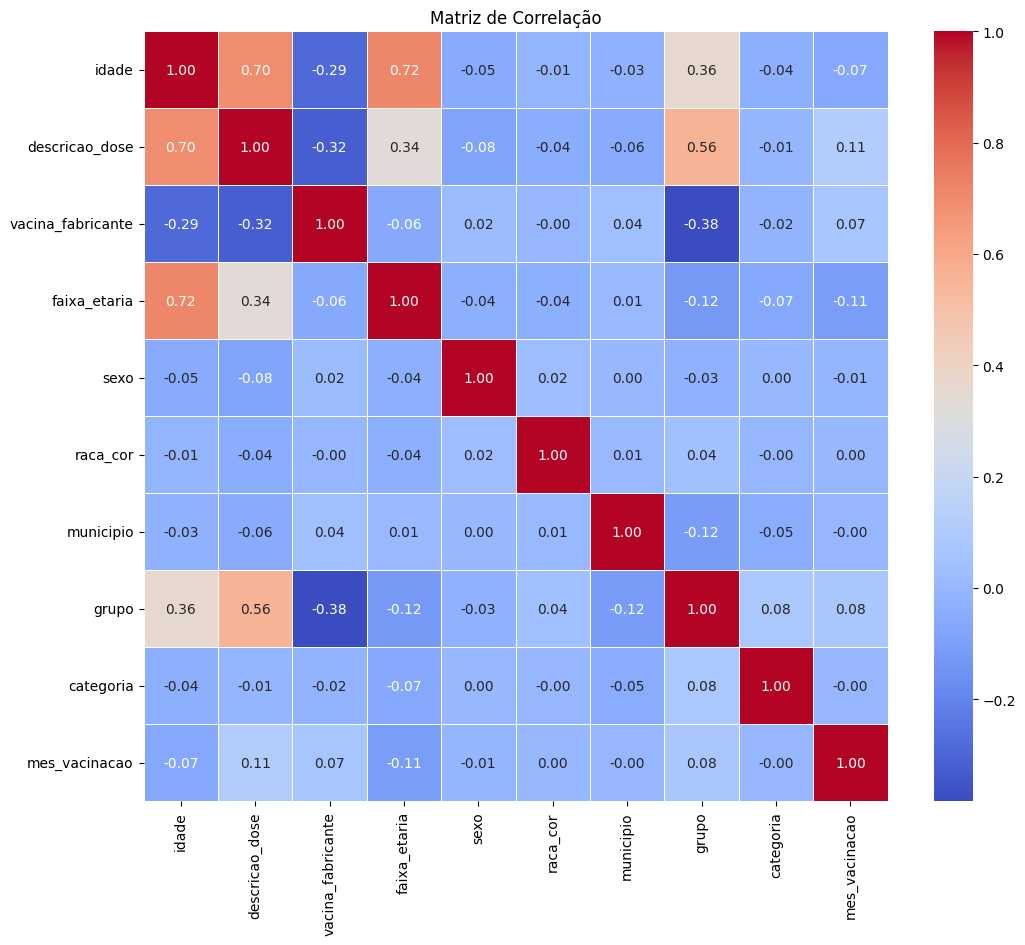

In [39]:


# Visualização da matriz de correlação como um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Interpretações Específicas
1. idade e descricao_dose (0.696386):

    - Há uma correlação positiva forte entre a idade e a descrição da dose. Isso sugere que pessoas mais velhas tendem a ter um número maior de doses de vacina.
2. idade e faixa_etaria (0.717668):

    - Existe uma correlação positiva forte entre idade e faixa etária. Isso é esperado, pois a faixa etária é uma categorização direta da idade.
3. idade e grupo (0.361579):

    - Há uma correlação positiva moderada entre idade e grupo. Isso pode indicar que certos grupos, como idosos, têm uma idade média maior.
4. descricao_dose e grupo (0.559045):

    - Há uma correlação positiva forte entre a descrição da dose e o grupo. Isso sugere que certos grupos, como idosos, podem ter recebido mais doses.

5. vacina_fabricante e grupo (-0.383767):
    - Correlação negativa moderada entre o fabricante da vacina e o grupo de vacinação. Isso pode sugerir que diferentes grupos populacionais receberam vacinas de diferentes fabricantes.


# Outras Correlações Menores
1. idade e sexo (-0.054828):

    - Correlação muito fraca e negativa, indicando que não há praticamente nenhuma relação entre idade e sexo.
2. idade e raca_cor (-0.013811):

    - Correlação praticamente nula, sugerindo que a idade não está relacionada com a raça/cor.
3. descricao_dose e vacina_fabricante (-0.324399):

    - Correlação negativa moderada, sugerindo que o fabricante da vacina pode ter alguma influência no número de doses recebidas, mas não é uma correlação muito forte.
4. descricao_dose e sexo (-0.084650):

    - Correlação muito fraca e negativa, indicando pouca ou nenhuma relação entre a quantidade de doses e o sexo.
5. vacina_fabricante e grupo (-0.383767):

    - Correlação negativa moderada, sugerindo que diferentes fabricantes podem estar relacionados a diferentes grupos populacionais.

# Correlações Próximas de Zero
Muitas das outras correlações são próximas de zero, sugerindo pouca ou nenhuma relação entre essas variáveis. Como por exemplo:

1. vacina_fabricante e raca_cor (-0.000526)
2. sexo e municipio (0.004487)


#Considerações Finais
As correlações mais interessantes e fortes que você pode explorar são:

1. A relação entre idade e número de doses (descricao_dose).
2. A relação entre idade e grupo, particularmente para grupos de risco como idosos.
3. A relação entre a faixa etária e o grupo ou o fabricante da vacina, que podem refletir políticas de vacinação específicas.

In [42]:
# Salvando como CSV
df.to_csv('vacinas_2022.csv', index=False)  # index=False para não incluir o índice do DataFrame no arquivo CSV